# Project Topic: Understanding factors that affects employee attrition


# Setting the environment by Importing libraries needed

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the dataset

In [88]:
df = pd.read_csv("employeeAttrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [89]:
#dropping the columns that are not needed
new_df = df.drop([ 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'Over18', 'StandardHours','WorkLifeBalance', 'StockOptionLevel', 'YearsInCurrentRole','DailyRate', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1)
new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,5993,19479,8,Yes,11,3,1,8,0,6
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,5130,24907,1,No,23,4,4,10,3,10
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,2090,2396,6,Yes,15,3,2,7,3,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,2909,23159,1,Yes,11,3,3,8,3,8
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3468,16632,9,No,12,3,4,6,3,2


In [90]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null object
PercentSalaryHike    

In [91]:
new_df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,11.279592,2.799320,7.008163
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,7.780782,1.289271,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,6.000000,40.000000


In [92]:
# Adding new column 'AgeRange'
age_ranges = ["{0} - {1}".format(age, age + 10) for age in range(10, 60, 10)]
age_ranges
count_unique_age_ranges = len(age_ranges)
count_unique_age_ranges
new_df['AgeRange'] = pd.cut(x=new_df['Age'], bins=count_unique_age_ranges, labels=age_ranges)
new_df.head(6)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,AgeRange
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,19479,8,Yes,11,3,1,8,0,6,30 - 40
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,24907,1,No,23,4,4,10,3,10,40 - 50
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,2396,6,Yes,15,3,2,7,3,0,30 - 40
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,23159,1,Yes,11,3,3,8,3,8,20 - 30
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,16632,9,No,12,3,4,6,3,2,20 - 30
5,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,4,Male,3,...,11864,0,No,13,3,3,8,2,7,20 - 30


In [93]:
#group by AgeRange
group_df= new_df.groupby(['AgeRange']).count()
group_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany
AgeRange,,,,,,,,,,,,,,,,,,,,,
10 - 20,162,162,162,162,162,162,162,162,162,162,...,162,162,162,162,162,162,162,162,162,162
20 - 30,489,489,489,489,489,489,489,489,489,489,...,489,489,489,489,489,489,489,489,489,489
30 - 40,472,472,472,472,472,472,472,472,472,472,...,472,472,472,472,472,472,472,472,472,472
40 - 50,223,223,223,223,223,223,223,223,223,223,...,223,223,223,223,223,223,223,223,223,223
50 - 60,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124


# Question: How does age and gender affect employee attrition, does it has anything to tell/hint us about our health?

NameError: name 'AgeRangeFrequecy' is not defined

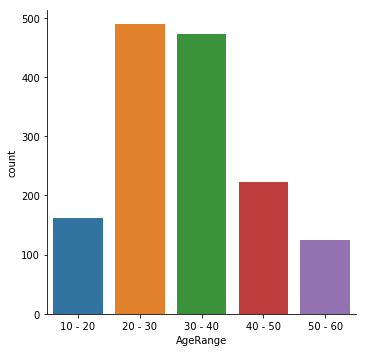

In [94]:
#showing the frequency of age range
AgeRangeFrequency = sns.catplot(x='AgeRange',data=new_df, kind='count', ci=None)
AgeRangeFrequecy.fig.suptitle('This table shows the Frequency of Age', y= 1.03)


Text(0.5, 1.03, 'This table shows the AgeRange that has the highest Yes and Higest No level of Attrition')

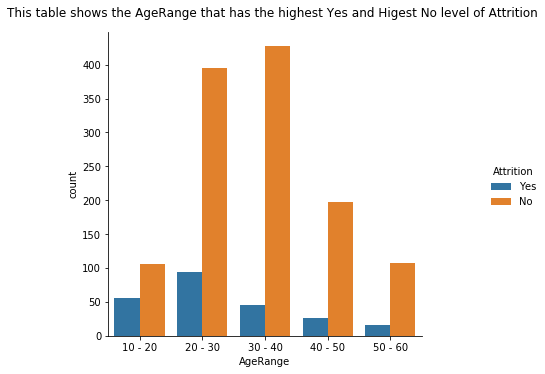

In [95]:
# Age range with the highest value where attrition is Yes and No
HighestAttrition= sns.catplot(x='AgeRange',data=new_df, ci = None, kind= 'count', hue='Attrition')
HighestAttrition.fig.suptitle('This table shows the AgeRange that has the highest Yes and Higest No level of Attrition', y= 1.03)


Text(0.5, 1.05, 'This table shows the level of attrition based on Gender and Age Range')

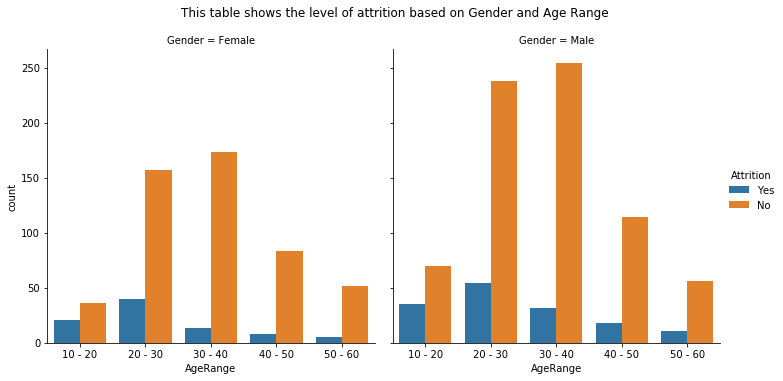

In [96]:
#This table shows the level of attrition based on Gender and Age Range
hg=sns.catplot(x='AgeRange',col='Gender',data=new_df, ci = None, kind= 'count', hue='Attrition')
hg.fig.suptitle('This table shows the level of attrition based on Gender and Age Range', y= 1.05)

# Question: How does work performance rating  affect employee attrition, In what way does level of education enhance work performance rating (positively/negatively) and how does it affect employee attrition

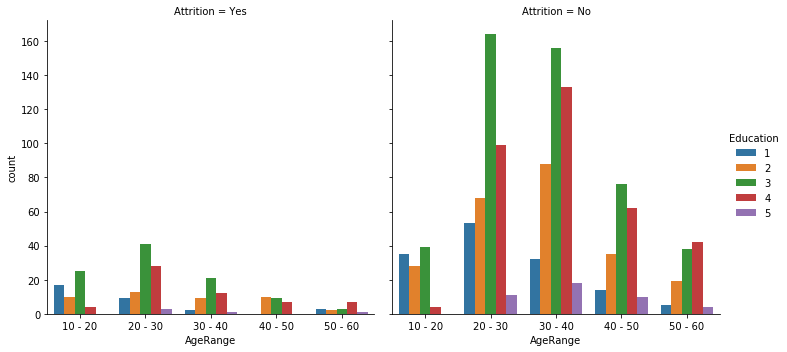

In [97]:
#This table shows the effect of education on employee attrition
sns.catplot(x='AgeRange',col='Attrition', data= new_df, kind= 'count', hue='Education')



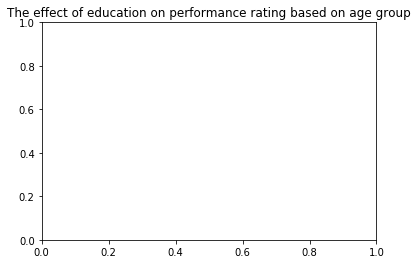

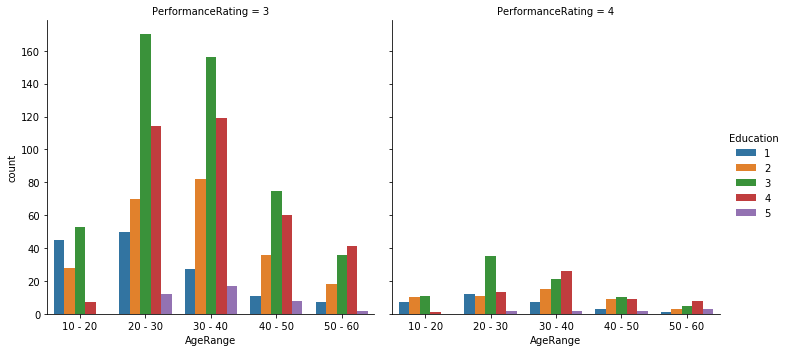

In [98]:
#this table shows how education affects Performance Rating
plt.title('The effect of education on performance rating based on age group')
sns.catplot(x='AgeRange',col='PerformanceRating', data= new_df, kind= 'count', hue='Education')

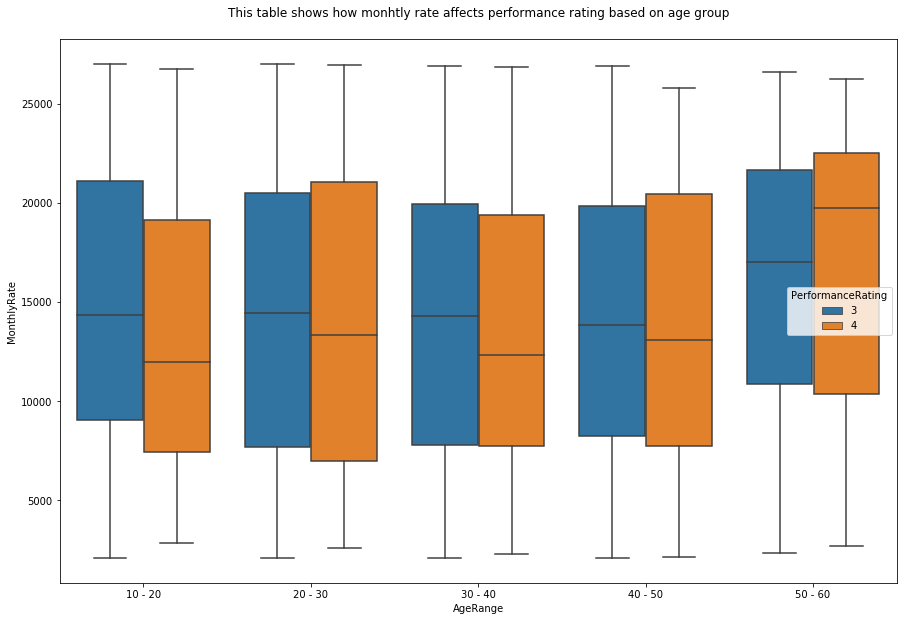

In [99]:
#this plot is supposed to depict how monthly rate affects Performance rating using Age Range

plt.figure(figsize=(15,10))
plt.title('This table shows how monhtly rate affects performance rating based on age group', y = 1.03)
sns.boxplot(x='AgeRange',y='MonthlyRate', data= new_df, hue='PerformanceRating')

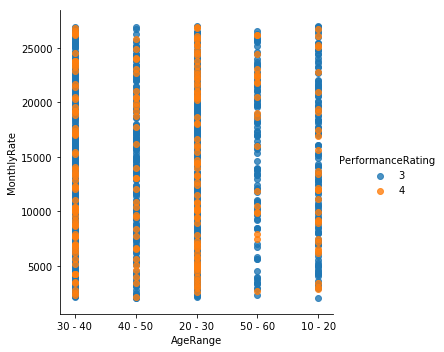

In [100]:
#this plot is supposed to depict how monthly rate affects Performance rating using Age Range
sns.lmplot(x='AgeRange', y='MonthlyRate', data=new_df,
           fit_reg=False, # No regression line
           hue='PerformanceRating')   # Color by evolution stage

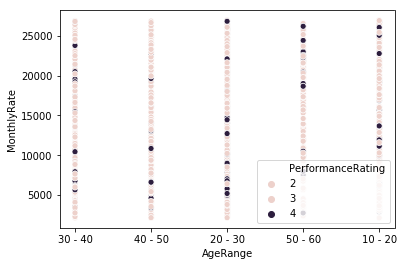

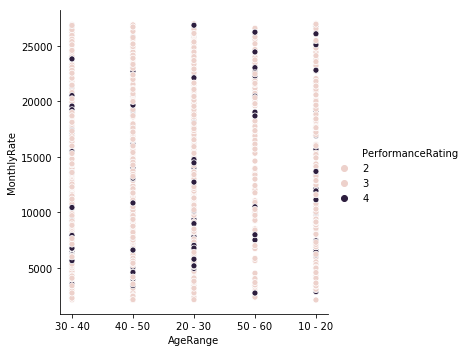

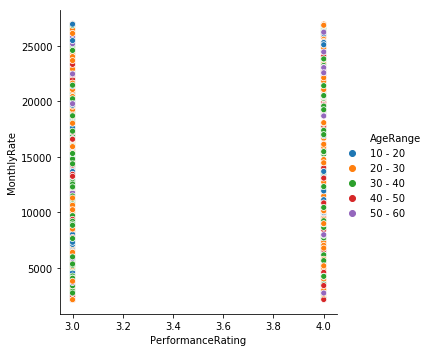

In [101]:
#this plot is supposed to depict how monthly rate affects Performance rating using Age Range
sns.scatterplot(x='AgeRange', y='MonthlyRate', data=new_df, hue= 'PerformanceRating')
sns.relplot(x='AgeRange', y='MonthlyRate', data=new_df, hue= 'PerformanceRating')
sns.relplot(x='PerformanceRating', y='MonthlyRate', data=new_df, hue= 'AgeRange')

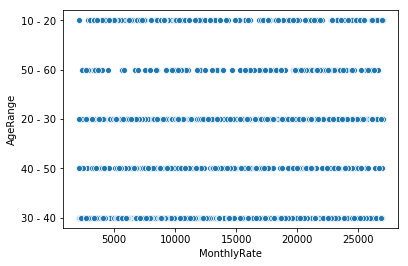

In [102]:
sns.scatterplot(x='MonthlyRate',y='AgeRange',data=new_df)

# Question: How does distance from home affect work performance rating and in what way does it leads to employee attrition?

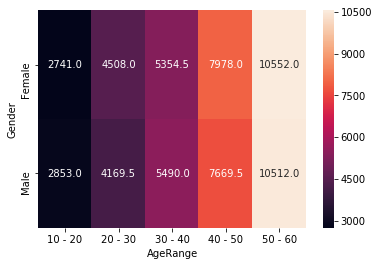

In [103]:
# This plt shows how distance from work affect performance rating based on age range
df = new_df.pivot_table(index='Gender', columns='AgeRange', values='MonthlyIncome', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")
plt.show()

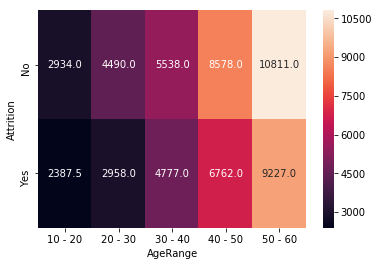

In [104]:
# # This plt shows how distance from work affect performance rating based on Atrrition
df = new_df.pivot_table(index='Attrition', columns='AgeRange', values='MonthlyIncome', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")
plt.show()

# Question: How is job satisfaction rate a factor for employee attrition?

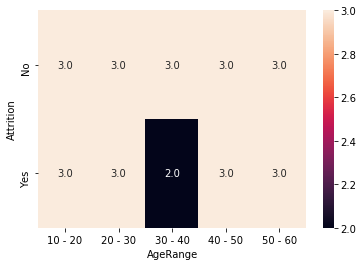

In [105]:
# this plt shows the relationship between job satisfaction rate and level of attrition
heat_df = new_df.pivot_table(index='Attrition', columns='AgeRange', values='JobSatisfaction', aggfunc=np.median)
sns.heatmap(heat_df, annot=True, fmt=".1f")
plt.show()

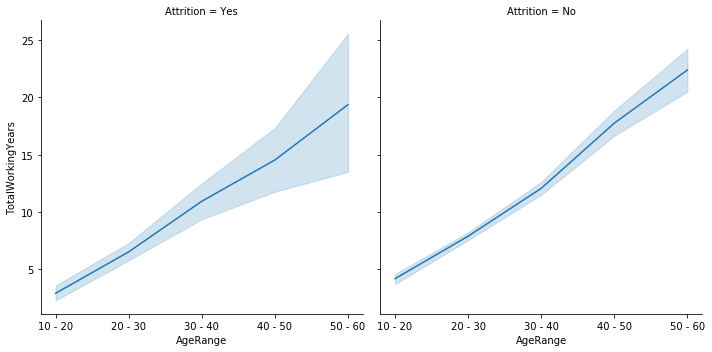

In [106]:
# The Relationship between AgeRange and Total working years and level of attrition
sns.relplot(x="AgeRange", y="TotalWorkingYears", col='Attrition',kind="line", data=new_df)

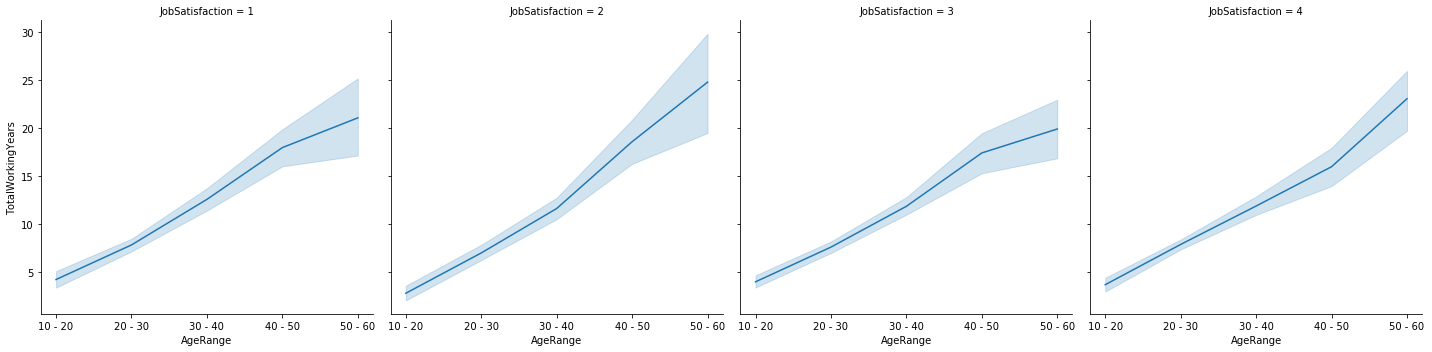

In [107]:
#sns.relplot(x='Attrition',y='TotalWorkingYears',hue='MaritalStatus',size='AgeRange',col='Gender',data=new_df)

# The Relationship between AgeRange, Total working years and Jobsatisfcation
sns.relplot(x="AgeRange", y="TotalWorkingYears", col='JobSatisfaction',kind="line", data=new_df)

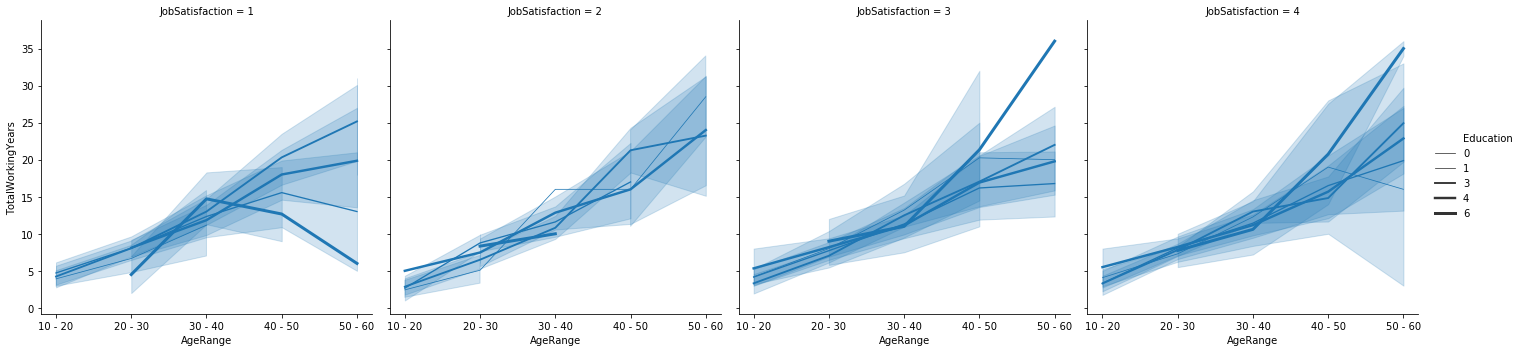

In [108]:
# The Relationship between AgeRange,Total working years, Jobsatisfcation and Education
sns.relplot(x="AgeRange", y="TotalWorkingYears", col='JobSatisfaction',kind="line",size='Education', data=new_df )


# Question: Who is at risk of employee attrition: 
            #Male: Single, married or divorced
            #Female: Single, married or divorced


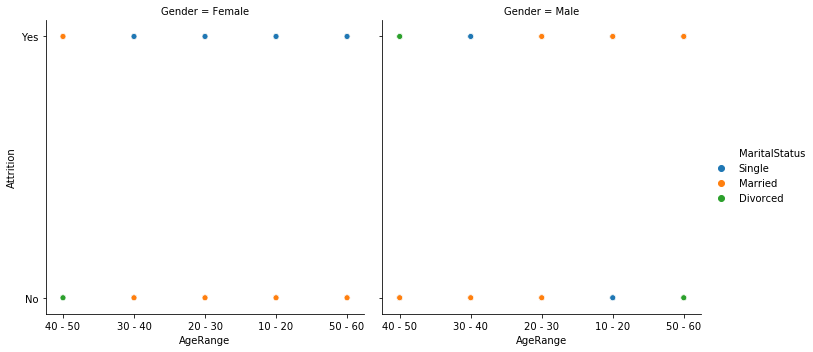

In [109]:
# This plt shows the category of people at the risk of employee attrition based on age range
sns.relplot(x='AgeRange',y='Attrition',hue='MaritalStatus',col='Gender',data=new_df)